In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduates-admission-prediction/admission_data.csv


## EDA

In [2]:
df=pd.read_csv('/kaggle/input/graduates-admission-prediction/admission_data.csv')
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [3]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB
None


In [4]:
# Display summary statistics of numerical columns
print(df.describe())

        GRE Score  TOEFL Score  University Rating         SOP       LOR   \
count  500.000000   500.000000         500.000000  500.000000  500.00000   
mean   316.472000   107.192000           3.114000    3.374000    3.48400   
std     11.295148     6.081868           1.143512    0.991004    0.92545   
min    290.000000    92.000000           1.000000    1.000000    1.00000   
25%    308.000000   103.000000           2.000000    2.500000    3.00000   
50%    317.000000   107.000000           3.000000    3.500000    3.50000   
75%    325.000000   112.000000           4.000000    4.000000    4.00000   
max    340.000000   120.000000           5.000000    5.000000    5.00000   

             CGPA    Research  Chance of Admit   
count  500.000000  500.000000         500.00000  
mean     8.576440    0.560000           0.72174  
std      0.604813    0.496884           0.14114  
min      6.800000    0.000000           0.34000  
25%      8.127500    0.000000           0.63000  
50%      8.5600

In [5]:
df.shape

(500, 8)

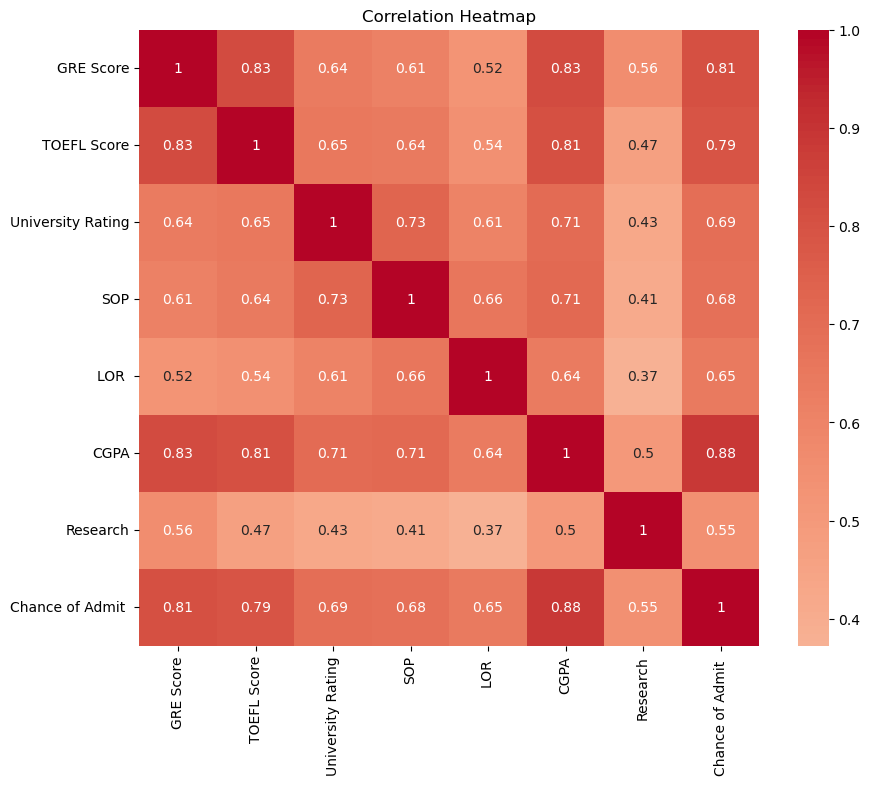

In [8]:
# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

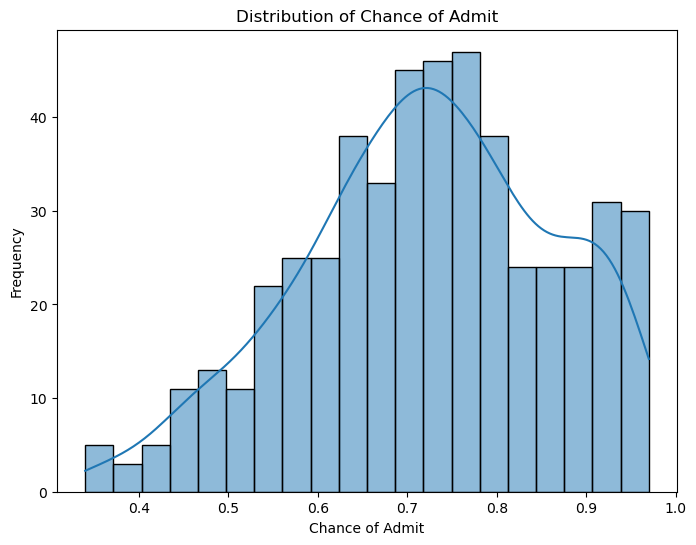

In [11]:
# Distribution of Chance of Admit
plt.figure(figsize=(8, 6))
sns.histplot(df['Chance of Admit '], bins=20, kde=True)
plt.title('Distribution of Chance of Admit')
plt.xlabel('Chance of Admit')
plt.ylabel('Frequency')
plt.show()

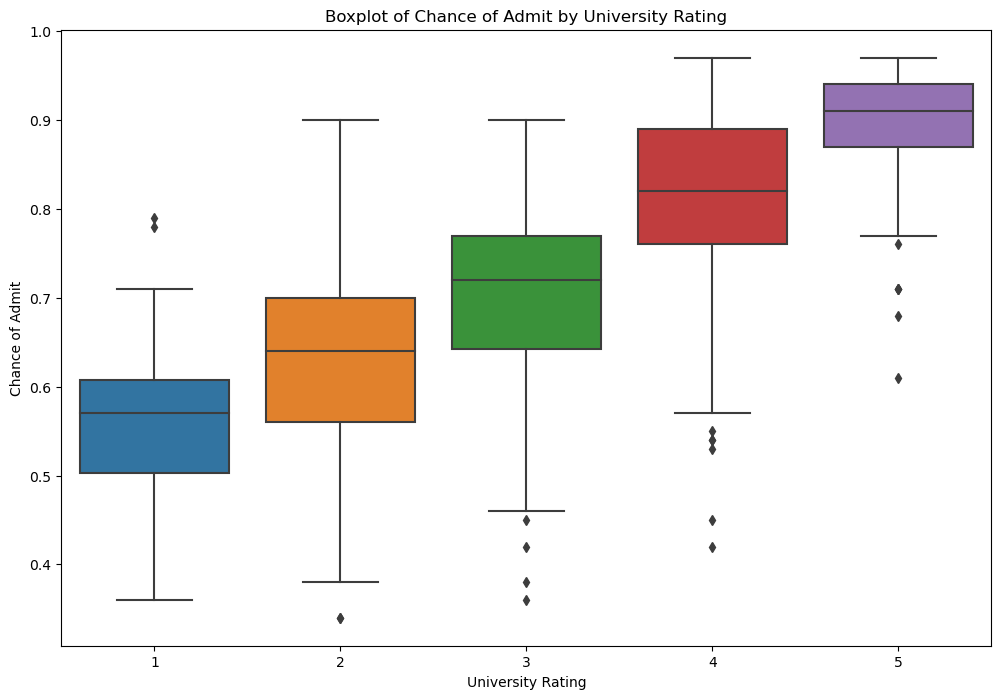

In [14]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='University Rating', y='Chance of Admit ')
plt.title('Boxplot of Chance of Admit by University Rating')
plt.xlabel('University Rating')
plt.ylabel('Chance of Admit')
plt.show()

## Split the Dataset

In [15]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

### Scale Data

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_trained_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

## Model Buiding and Evaluation

In [18]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [19]:
#Create a sequential model
model=Sequential()
#Add a hidden layer with 7 units and relu activation function, expecting input of dimension 11
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu',))
model.add(Dense(7,activation='relu',))
#Add a output layer with 1 units
model.add(Dense(1,activation='linear'))


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 dense_2 (Dense)             (None, 7)                 56        
                                                                 
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 176
Trainable params: 176
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [22]:
#Train the model using the scaled training data (X_trained_scaled) and training labels (y_train) for 100 epochs
#taking validation data of 20% from train dataset for varification purpose
history=model.fit(X_trained_scaled,y_train,epochs=150,validation_split=0.2)

Epoch 1/150
10/10 [==============================] - 1s 22ms/step - loss: 0.5123 - val_loss: 0.4909
Epoch 2/150
10/10 [==============================] - 0s 5ms/step - loss: 0.4342 - val_loss: 0.4190
Epoch 3/150
10/10 [==============================] - 0s 7ms/step - loss: 0.3694 - val_loss: 0.3536
Epoch 4/150
10/10 [==============================] - 0s 5ms/step - loss: 0.3065 - val_loss: 0.2881
Epoch 5/150
10/10 [==============================] - 0s 4ms/step - loss: 0.2438 - val_loss: 0.2206
Epoch 6/150
10/10 [==============================] - 0s 5ms/step - loss: 0.1805 - val_loss: 0.1562
Epoch 7/150
10/10 [==============================] - 0s 4ms/step - loss: 0.1221 - val_loss: 0.0989
Epoch 8/150
10/10 [==============================] - 0s 6ms/step - loss: 0.0715 - val_loss: 0.0532
Epoch 9/150
10/10 [==============================] - 0s 4ms/step - loss: 0.0342 - val_loss: 0.0227
Epoch 10/150
10/10 [==============================] - 0s 5ms/step - loss: 0.0138 - val_loss: 0.0090
Epoch 11

In [23]:
y_pred=model.predict(X_test_scaled)

4/4 [==============================] - 0s 2ms/step


In [26]:
#evalaute model with r2 matrix
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7552949901871345

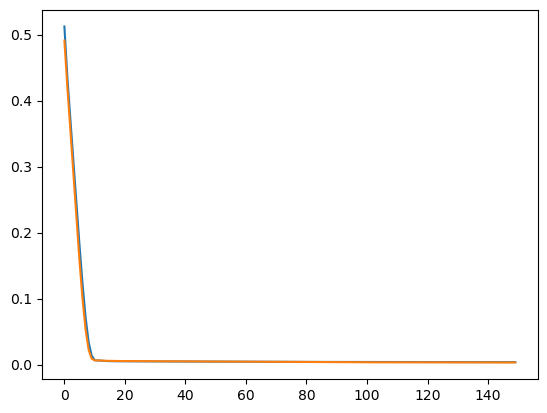

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

## Save Model

In [27]:
# Save the trained model
model.save('Graduates Admission Prediction.h5')

print("Model saved successfully!")


Model saved successfully!


In [28]:
from IPython.display import FileLink

FileLink('Graduates Admission Prediction.h5')

/kaggle/working/Graduates Admission Prediction.h5